In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../Data/Twitter.csv", header=None, encoding='latin-1')
data.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Tweet']
data.head()

,Sentiment,ID,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
data.isna().sum()

Sentiment    0
ID           0
Date         0
Query        0
User         0
Tweet        0
dtype: int64

In [4]:
data['Sentiment'].value_counts()
# 0 = negative
# 4 = positive

0    800000
4    800000
Name: Sentiment, dtype: int64

In [5]:
data['User'].value_counts()
#Einige User sind mit mehreren Tweets vertreten

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: User, Length: 659775, dtype: int64

In [6]:
print(f"Anzahl der einzigartigen User im Datensatz ist: {data['User'].nunique()}")
print(f"Anzahl der User von denen nur ein Tweet im Datensatz ist: {(data['User'].value_counts()==1).sum()}")
print(f"Anzahl der User von denen mehrere Tweets im Datensatz sind: {(data['User'].value_counts()>1).sum()}")

Anzahl der einzigartigen User im Datensatz ist: 659775
Anzahl der User von denen nur ein Tweet im Datensatz ist: 405277
Anzahl der User von denen mehrere Tweets im Datensatz sind: 254498


              User  Tweets
0         lost_dog     549
1          webwoke     345
2         tweetpet     310
3  SallytheShizzle     281
4      VioletsCRUK     279
Anzahl der User von denen mehr als 25 Tweets im Datensatz sind: 3789


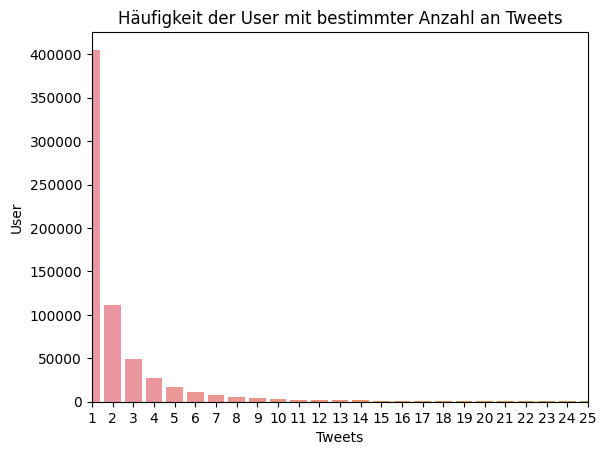

In [7]:
twt_per_user = pd.DataFrame(data['User'].value_counts()).reset_index()
twt_per_user.columns = ['User', 'Tweets']
print(twt_per_user.head(5))
sns.countplot(twt_per_user, x="Tweets")
plt.xlim(0,24)
plt.title("Häufigkeit der User mit bestimmter Anzahl an Tweets")
plt.xlabel("Tweets")
plt.ylabel("User")
print(f"Anzahl der User von denen mehr als 25 Tweets im Datensatz sind: {(data['User'].value_counts()>25).sum()}")
# Plot ist reingezoomt

In [8]:
data['num_strings'] = data['Tweet'].str.split().str.len()
data

,Sentiment,ID,Date,Query,User,Tweet,num_strings
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,11
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,11
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,11
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,12


In [58]:
print(f"Durchschnittliche Anzahl an Strings je Tweet: {data['num_strings'].mean()}")
print(data.groupby('Sentiment')['num_strings'].mean())



Durchschnittliche Anzahl an Strings je Tweet: 13.176150625
Sentiment
0    13.581984
4    12.770318
Name: num_strings, dtype: float64


Negative Tweets sind im Durchschnitt länger als positive Tweets

## Wordcloud

In [12]:
from wordcloud import WordCloud

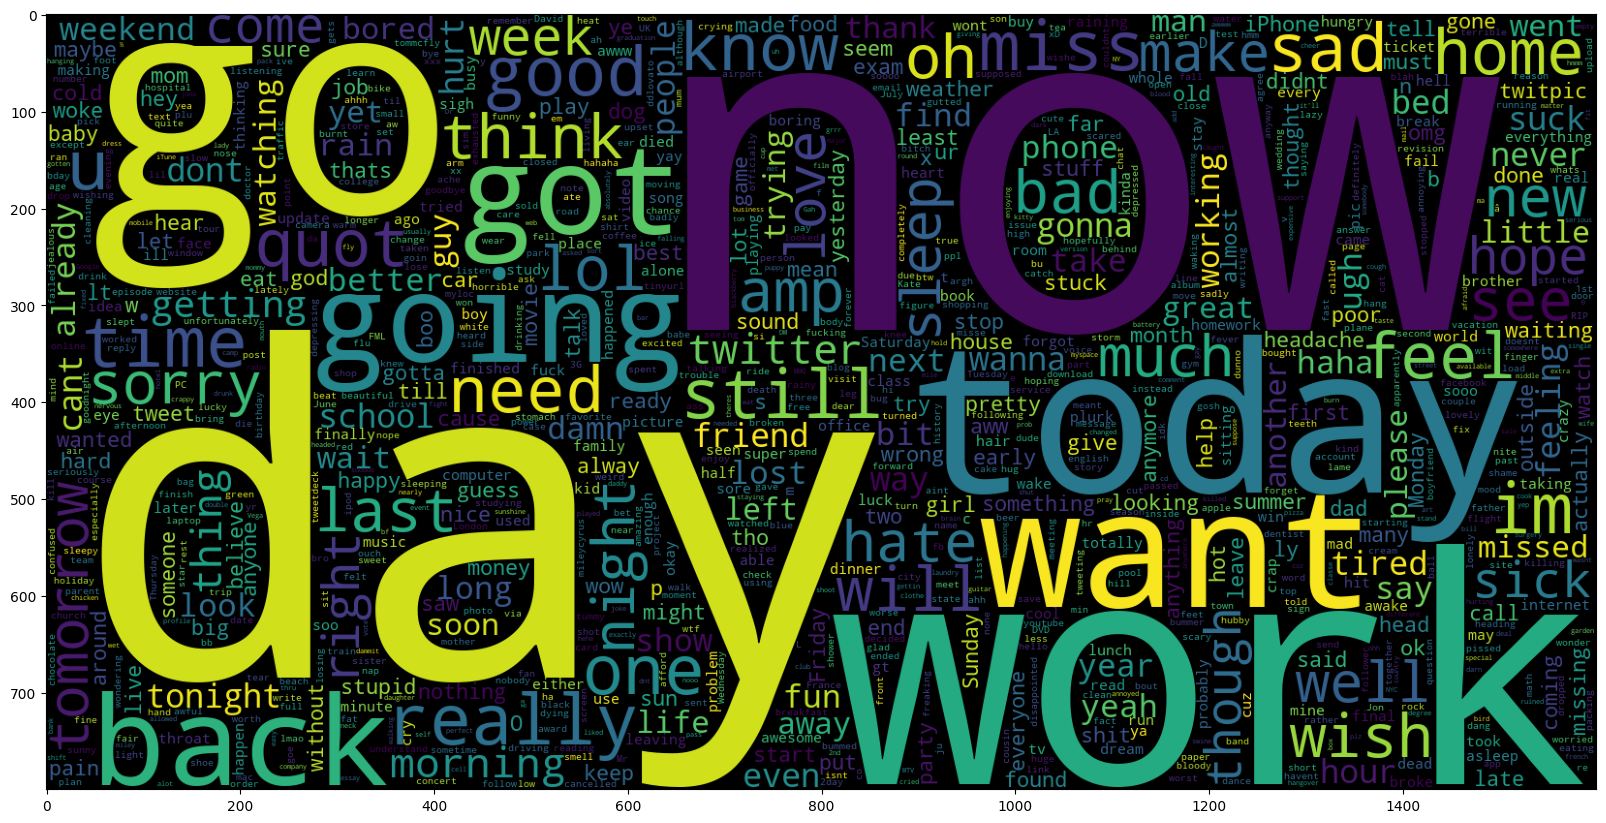

In [14]:
data_neg = data['Tweet'][data['Sentiment']==0]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

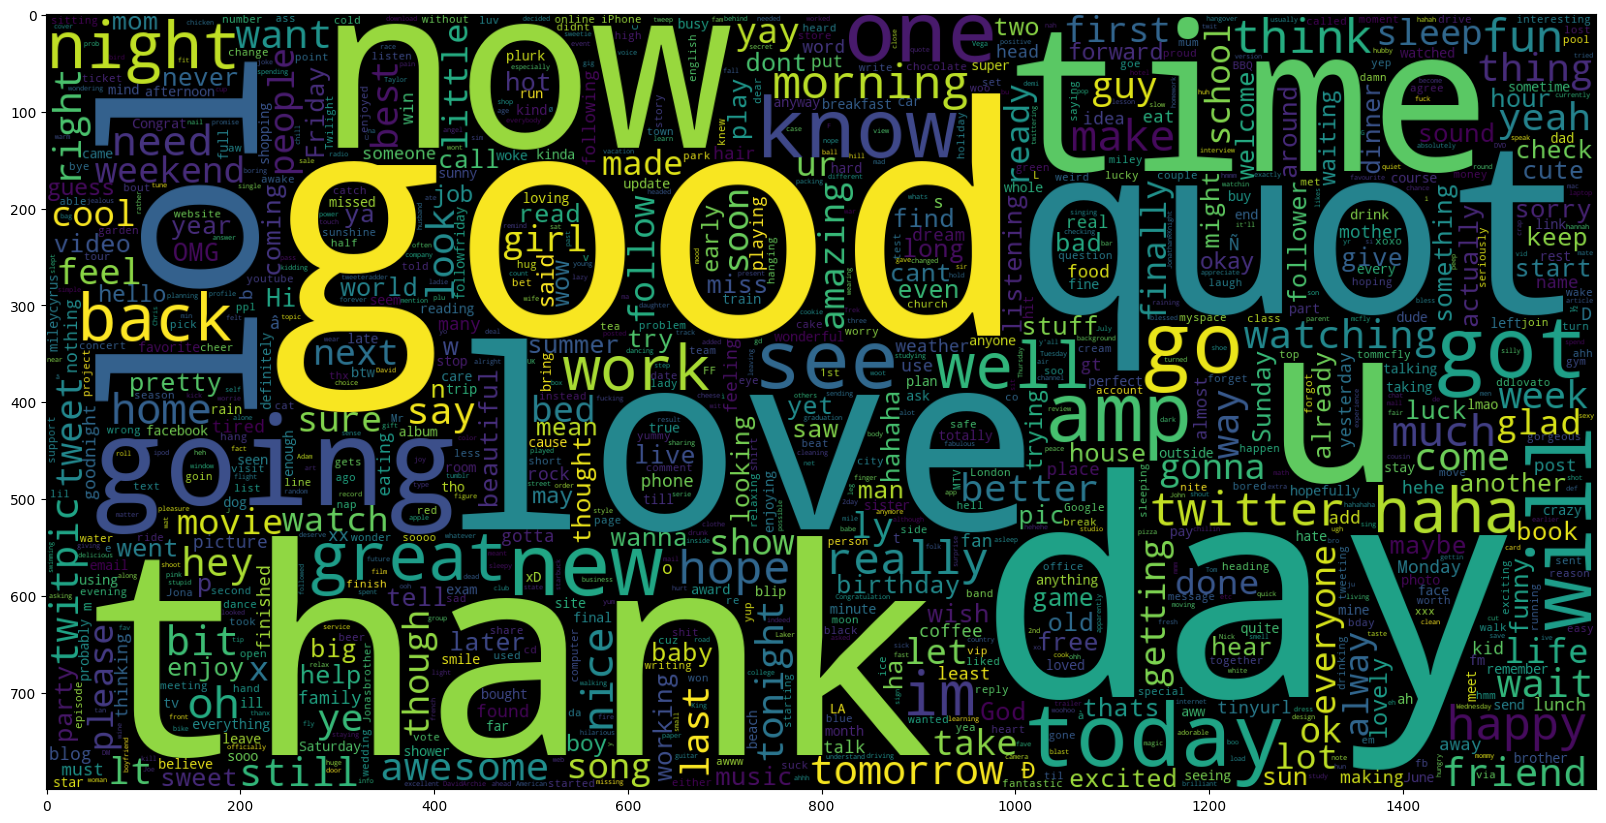

In [15]:
data_neg = data['Tweet'][data['Sentiment']==4]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

## Lexikon

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dave\AppData\Roaming\nltk_data...


True

In [32]:
sia = SentimentIntensityAnalyzer()



In [36]:
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

In [44]:
data['compound_score'] = data['Tweet'].apply(get_sentiment_score)
data['compound_class'] = np.where(data['compound_score']>=0, 1, 0)

<AxesSubplot: >

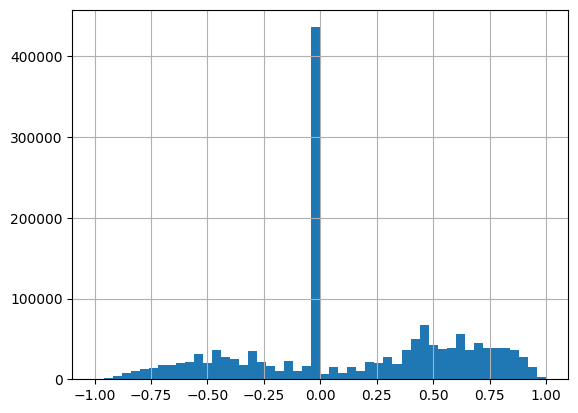

In [42]:
data['compound_score'].hist(bins=50)

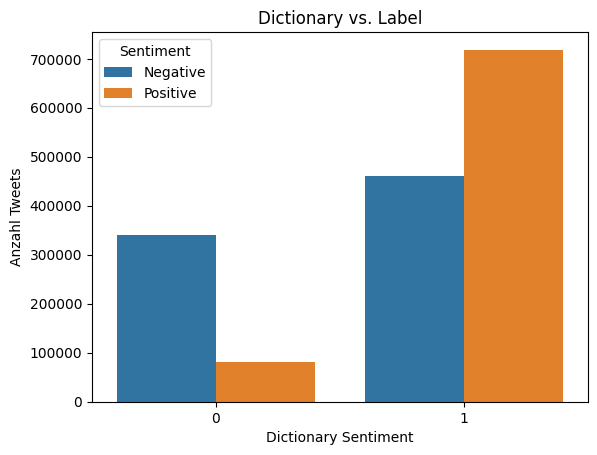

In [57]:
sns.countplot(data=data, x='compound_class', hue='Sentiment')
plt.title('Dictionary vs. Label')
plt.xlabel('Dictionary Sentiment')
plt.ylabel('Anzahl Tweets')
plt.legend(title='Sentiment', loc='upper left', labels=['Negative', 'Positive'])
# 0 = negative 1 = positive